In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import time
import random
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45202 non-null  float64
 2   job        45211 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [4]:
df.isna().sum().sort_values(ascending=False)

age          9
balance      3
Id           0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
loan         0
housing      0
default      0
education    0
marital      0
job          0
y            0
dtype: int64

In [5]:
df = df[df['age'].notnull()]
df = df[df['balance'].notnull()]

In [6]:
df['age'].describe()

count    45200.000000
mean        40.954292
std         11.539117
min         -1.000000
25%         33.000000
50%         39.000000
75%         48.000000
max        999.000000
Name: age, dtype: float64

In [7]:
df[df['age'] <= 0]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45203,46204,-1.0,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,46205,-1.0,retired,married,secondary,no,2850.0,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,46206,-1.0,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


In [8]:
df = df[df['age'] > 0]

In [9]:
df.sort_values(by=['age'],ascending=0)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
33699,34700,95.0,retired,divorced,primary,no,2282.0,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
41663,42664,95.0,retired,married,secondary,no,0.0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
31233,32234,94.0,retired,divorced,secondary,no,1234.0,no,no,cellular,3,mar,212,1,-1,0,unknown,no
44420,45421,93.0,retired,married,unknown,no,775.0,no,no,cellular,4,aug,476,2,13,9,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40887,41888,18.0,student,single,primary,no,608.0,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
44644,45645,18.0,student,single,unknown,no,438.0,no,no,cellular,1,sep,425,1,-1,0,unknown,no
42146,43147,18.0,student,single,secondary,no,156.0,no,no,cellular,4,nov,298,2,82,4,other,no
41487,42488,18.0,student,single,unknown,no,108.0,no,no,cellular,8,sep,169,1,-1,0,unknown,yes


In [10]:
df = df[df['age'] != 999]

In [11]:
df['job'].unique()

array(['technician', 'entrepreneur', 'blue-collar', 'unknown',
       'management', 'admin.', 'services', 'retired', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [12]:
df['job'].value_counts()

blue-collar      9730
management       9456
technician       7594
admin.           5169
services         4153
retired          2262
self-employed    1579
entrepreneur     1485
unemployed       1303
housemaid        1240
student           937
unknown           288
Name: job, dtype: int64

In [13]:
df['marital'].unique()

array(['single', 'married', 'divorced'], dtype=object)

In [14]:
df.job=df.job.astype('category').cat.codes

In [15]:
df.marital=df.marital.astype('category').cat.codes

In [16]:
df['education'].unique()

array(['secondary', 'unknown', 'tertiary', 'primary'], dtype=object)

In [17]:
df[df['education'] == 'unknown']

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,1004,47.0,1,1,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,11,2,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
13,1014,58.0,9,1,unknown,no,71.0,yes,no,unknown,5,may,71,1,-1,0,unknown,no
16,1017,45.0,0,2,unknown,no,13.0,yes,no,unknown,5,may,98,1,-1,0,unknown,no
42,1043,60.0,1,1,unknown,no,104.0,yes,no,unknown,5,may,22,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45129,46130,46.0,9,1,unknown,no,3308.0,no,no,cellular,27,oct,171,1,91,2,success,yes
45141,46142,77.0,11,1,unknown,no,397.0,no,no,telephone,8,nov,207,1,185,3,success,no
45150,46151,65.0,4,1,unknown,no,2352.0,no,no,cellular,8,nov,354,3,188,13,success,no
45158,46159,34.0,8,2,unknown,no,2321.0,no,no,cellular,9,nov,600,2,99,5,failure,no


In [18]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
df['balance'].describe()

count     45196.000000
mean       1362.562129
std        3045.192527
min       -8019.000000
25%          72.000000
50%         449.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<AxesSubplot: >

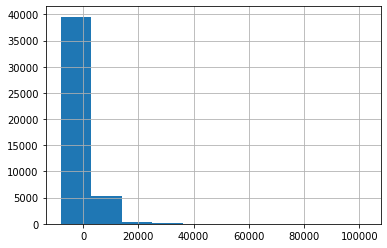

In [20]:
df.balance.hist()

In [21]:
df.sort_values(by=['balance'],ascending=0)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39989,40990,51.0,4,2,tertiary,no,102127.0,no,no,cellular,3,jun,90,1,-1,0,unknown,no
26227,27228,59.0,4,1,tertiary,no,98417.0,no,no,telephone,20,nov,145,5,-1,0,unknown,no
42558,43559,84.0,5,1,secondary,no,81204.0,no,no,telephone,28,dec,679,1,313,2,other,yes
43393,44394,84.0,5,1,secondary,no,81204.0,no,no,telephone,1,apr,390,1,94,3,success,yes
41693,42694,60.0,5,1,primary,no,71188.0,no,no,cellular,6,oct,205,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,2897,57.0,6,1,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
7413,8414,43.0,4,1,tertiary,yes,-3372.0,yes,no,unknown,29,may,386,2,-1,0,unknown,no
38736,39737,60.0,4,0,tertiary,no,-4057.0,yes,no,cellular,18,may,242,6,-1,0,unknown,no
15682,16683,49.0,4,1,tertiary,yes,-6847.0,no,yes,cellular,21,jul,206,1,-1,0,unknown,no


In [22]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [23]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [24]:
df['previous'].describe()

count    45196.000000
mean         0.580339
std          2.303536
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [25]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [26]:
df[df['poutcome'] == 'other']

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24062,25063,42.0,0,2,secondary,no,-247.0,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24072,25073,36.0,4,1,tertiary,no,2415.0,yes,no,telephone,22,oct,73,1,86,4,other,no
24086,25087,44.0,1,1,secondary,no,1324.0,yes,no,telephone,25,oct,119,1,89,2,other,no
24122,25123,26.0,9,2,tertiary,no,172.0,no,yes,telephone,4,nov,21,1,140,4,other,no
24136,25137,34.0,4,1,tertiary,no,1770.0,yes,no,unknown,6,nov,26,1,101,11,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45153,46154,64.0,5,1,tertiary,no,2059.0,no,yes,cellular,9,nov,326,1,95,1,other,no
45165,46166,33.0,9,1,tertiary,no,2976.0,yes,no,cellular,9,nov,465,2,95,12,other,no
45170,46171,19.0,8,2,primary,no,245.0,no,no,telephone,10,nov,98,2,110,2,other,no
45199,46200,34.0,1,2,secondary,no,1475.0,yes,no,cellular,16,nov,1166,3,530,12,other,no


In [27]:
df = df.drop('Id', axis=1)

In [28]:
df.education=df.education.astype('category').cat.codes
df.housing=df.housing.astype('category').cat.codes
df.loan=df.loan.astype('category').cat.codes
df.contact=df.contact.astype('category').cat.codes
df.month=df.month.astype('category').cat.codes
df.poutcome=df.poutcome.astype('category').cat.codes
df.y=df.y.astype('category').cat.codes
df.default=df.default.astype('category').cat.codes

In [29]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,9,2,1,0,29.0,1,0,2,5,8,151,1,-1,0,3,0
2,33.0,2,1,1,0,2.0,1,1,2,5,8,76,1,-1,0,3,0
3,47.0,1,1,3,0,1506.0,1,0,2,5,8,92,1,-1,0,3,0
4,33.0,11,2,3,0,1.0,0,0,2,5,8,198,1,-1,0,3,0
5,35.0,4,1,2,0,231.0,1,0,2,5,8,139,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,1,2,0,825.0,0,0,0,17,9,977,3,-1,0,3,1
45207,71.0,5,0,0,0,1729.0,0,0,0,17,9,456,2,-1,0,3,1
45208,72.0,5,1,1,0,5715.0,0,0,0,17,9,1127,5,184,3,2,1
45209,57.0,1,1,1,0,668.0,0,0,1,17,9,508,4,-1,0,3,0


In [30]:
def trainTestSplit(dataFrame, testSize):
    if isinstance(testSize, float):
        testSize = round(testSize * len(dataFrame))
    indices = dataFrame.index.tolist()
    testIndices = random.sample(population = indices, k = testSize)
    dataFrameTest = dataFrame.loc[testIndices]
    dataFrameTrain = dataFrame.drop(testIndices)
    return dataFrameTrain, dataFrameTest

def Purity(data):
    if len(np.unique(data[:, -1])) == 1:
        return True
    else:
        return False

def classifyData(data):
    uniqueClasses, uniqueClassesCounts = np.unique(data[:, -1], return_counts = True)
    return uniqueClasses[uniqueClassesCounts.argmax()]

def getPotentialSplits(data):
    potentialSplits = {}
    _, columns = data.shape
    columnsIndices = list(range(columns - 1))
    
    for column in columnsIndices:
        values = data[:, column]
        uniqueValues = np.unique(values)
        if len(uniqueValues) == 1:
            potentialSplits[column] = uniqueValues
        else:
            potentialSplits[column] = []
            for i in range(len(uniqueValues)):
                if i != 0:
                    currentValue = uniqueValues[i]
                    previousValue = uniqueValues[i - 1]
                    potentialSplits[column].append((currentValue + previousValue) / 2)
    return potentialSplits

def splitData(data, splitColumn, splitValue):
    splitColumnValues = data[:, splitColumn]
    return data[splitColumnValues <= splitValue], data[splitColumnValues > splitValue]



In [31]:
def calculate_gini_index(data):
    # Count the occurrences of each class in the dataset
    _, class_counts = np.unique(data[:, -1], return_counts=True)
    # Calculate the probabilities for each class
    class_probabilities = class_counts / np.sum(class_counts)
    # Calculate the Gini index
    gini = 1 - np.sum(np.square(class_probabilities))
    return gini

def calculate_overall_gini(data_below, data_above):
    # Calculate the size of the splits
    n = len(data_below) + len(data_above)
    # Calculate the Gini index for each split
    gini_below = calculate_gini_index(data_below)
    gini_above = calculate_gini_index(data_above)
    # Calculate the weighted Gini index
    weighted_gini = (len(data_below) / n) * gini_below + (len(data_above) / n) * gini_above
    return weighted_gini



def determineBestSplit(data, potentialSplits):
    overallGini = 9999  # Start with a high Gini index
    bestSplitColumn = 0
    bestSplitValue = 0
    
    for splitColumn in potentialSplits:
        for splitValue in potentialSplits[splitColumn]:
            dataBelow, dataAbove = splitData(data, splitColumn, splitValue)
            currentOverallGini = calculate_overall_gini(dataBelow, dataAbove)
            if currentOverallGini <= overallGini:
                overallGini = currentOverallGini
                bestSplitColumn = splitColumn
                bestSplitValue = splitValue

    return bestSplitColumn, bestSplitValue



In [40]:
def buildDecisionTree(dataFrame, currentDepth = 0, minSampleSize = 2, maxDepth = 1000):
    if currentDepth == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = dataFrame.columns
        data = dataFrame.values
    else:
        data = dataFrame
    if Purity(data) or len(data) < minSampleSize or currentDepth == maxDepth:
        return classifyData(data)
    else:
        currentDepth += 1
        potentialSplits = getPotentialSplits(data)
        splitColumn, splitValue = determineBestSplit(data, potentialSplits)
        dataBelow, dataAbove = splitData(data, splitColumn, splitValue)
        if len(dataBelow) == 0 or len(dataAbove) == 0:
            return classifyData(data)
        else:
            question = str(COLUMN_HEADERS[splitColumn]) + " <= " + str(splitValue)
            decisionSubTree = {question: []}
            yesAnswer = buildDecisionTree(dataBelow, currentDepth, minSampleSize, maxDepth)
            noAnswer = buildDecisionTree(dataAbove, currentDepth, minSampleSize, maxDepth)
            if yesAnswer == noAnswer:
                decisionSubTree = yesAnswer
            else:
                decisionSubTree[question].append(yesAnswer)
                decisionSubTree[question].append(noAnswer)
            return decisionSubTree

def classifySample(sample, decisionTree):
    if not isinstance(decisionTree, dict):
        return decisionTree
    question = list(decisionTree.keys())[0]
    attribute, value = question.split(" <= ")
    if sample[attribute] <= float(value):
        answer = decisionTree[question][0]
    else:
        answer = decisionTree[question][1]
    return classifySample(sample, answer)

def decisionTreePredictions(dataFrame, decisionTree):
    predictions = dataFrame.apply(classifySample, axis = 1, args = (decisionTree,))
    return predictions

def calculateAccuracy(predictedResults, category):
    resultCorrect = predictedResults == category
    return resultCorrect.mean()

def crossValidation(dataFrame, maxDepth, k=5):
    kf = KFold(n_splits=k, shuffle=True)
    accuracies = []
    
    for train_index, test_index in kf.split(dataFrame):
        train, test = dataFrame.iloc[train_index], dataFrame.iloc[test_index]
        # Build the decision tree using the training data
        decision_tree = buildDecisionTree(train, maxDepth = maxDepth)
        
        # Get predictions for the test data
        predictions = decisionTreePredictions(test, decision_tree)
        
        # Calculate accuracy
        accuracy = calculateAccuracy(predictions, test['y'])
        accuracies.append(accuracy)
    
    # Return the average accuracy over all k-folds
    return np.mean(accuracies)
    

In [41]:
def plot_decision_tree(decisionTree, parent_name, node_pos, x_shift=0.2, y_shift=0.8, current_depth=0, max_depth=None):
    if max_depth is None or current_depth <= max_depth:
        if not isinstance(decisionTree, dict):
            plt.text(node_pos[0], node_pos[1], 'Leaf\nClass:\n{}'.format(decisionTree), horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
            return

        for index, (key, value) in enumerate(decisionTree.items()):
            question = key
            yes_answer, no_answer = value
            plt.text(node_pos[0], node_pos[1], '{}'.format(question), horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5'))
            
            # Recursively plot the 'yes' branch
            yes_pos = (node_pos[0] - x_shift/(2**current_depth), node_pos[1] - y_shift)
            plt.plot([node_pos[0], yes_pos[0]], [node_pos[1], yes_pos[1]], 'k-')
            plot_decision_tree(yes_answer, question, yes_pos, x_shift, y_shift, current_depth+1, max_depth)
            
            # Recursively plot the 'no' branch
            no_pos = (node_pos[0] + x_shift/(2**current_depth), node_pos[1] - y_shift)
            plt.plot([node_pos[0], no_pos[0]], [node_pos[1], no_pos[1]], 'k-')
            plot_decision_tree(no_answer, question, no_pos, x_shift, y_shift, current_depth+1, max_depth)


# gini

In [44]:
dfTrain, dfTest = trainTestSplit(df, testSize = 0.25)

maxDepth = 8
startTime = time.time()
decisionTree = buildDecisionTree(dfTrain, maxDepth = maxDepth)
accuracy = crossValidation(df, maxDepth, k=5)
buildingTime = time.time() - startTime
print(f"maxDepth = {maxDepth} ", end = "")
print(f"Average accuracy with 5-fold cross-validation: {accuracy:.2f} ", end = "") 
print("buildTime = {0:.2f}s".format(buildingTime), end = "\n")

maxDepth = 8 Average accuracy with 5-fold cross-validation: 0.90 buildTime = 502.72s


In [45]:

plt.figure(figsize=(250, 100))
plt.title('Decision Tree')
plot_decision_tree(decisionTree, '', (0.5, 1), max_depth=8)
plt.axis('off')
plt.show()


# entropy

In [46]:
def calculateEntropy(data):
    _, uniqueClassesCounts = np.unique(data[:, -1], return_counts = True)
    probabilities = uniqueClassesCounts / uniqueClassesCounts.sum()
    return sum(probabilities * -np.log2(probabilities))

def calculateOverallEntropy(dataBelow, dataAbove):
    pDataBelow = len(dataBelow) / (len(dataBelow) + len(dataAbove))
    pDataAbove = len(dataAbove) / (len(dataBelow) + len(dataAbove))
    return pDataBelow * calculateEntropy(dataBelow) + pDataAbove * calculateEntropy(dataAbove)

def determineBestSplit(data, potentialSplits):
    overallEntropy = 9999
    bestSplitColumn = 0
    bestSplitValue = 0
    
    for splitColumn in potentialSplits:
        for splitValue in potentialSplits[splitColumn]:
            dataBelow, dataAbove = splitData(data, splitColumn, splitValue)
            currentOverallEntropy = calculateOverallEntropy(dataBelow, dataAbove)
            if currentOverallEntropy <= overallEntropy:
                overallEntropy = currentOverallEntropy
                bestSplitColumn = splitColumn
                bestSplitValue = splitValue

    return bestSplitColumn, bestSplitValue

    



In [47]:
dfTrain, dfTest = trainTestSplit(df, testSize = 0.25)

maxDepth = 8
startTime = time.time()
decisionTree = buildDecisionTree(dfTrain, maxDepth = maxDepth)
accuracy = crossValidation(df, maxDepth, k=5)
buildingTime = time.time() - startTime
print(f"maxDepth = {maxDepth} ", end = "")
print(f"Average accuracy with 5-fold cross-validation: {accuracy:.2f} ", end = "") 
print("buildTime = {0:.2f}s".format(buildingTime), end = "\n")

maxDepth = 8 Average accuracy with 5-fold cross-validation: 0.90 buildTime = 370.10s


In [48]:
plt.figure(figsize=(250, 100))
plt.title('Decision Tree')
plot_decision_tree(decisionTree, '', (0.5, 1), max_depth=8)
plt.axis('off')
plt.show()